In [20]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [51]:
data = pd.DataFrame({'X1': [1,2,3,4,5], 
                     'X2': [2,3,4,5,6],
                     'X3': [2,6,3,7,1],
                     'X4': [3,1,3,5,2],
                     'Y' : [0,2,2,3,4]   })

data.head()



,X1,X2,X3,X4,Y
0,1,2,2,3,0
1,2,3,6,1,2
2,3,4,3,3,2
3,4,5,7,5,3
4,5,6,1,2,4


### **Multicollinearity** 
Refers to a situation in which two or more explanatory variables in a multiple regression model are highly linearly related. 

### The Problem with having Multicollinearity 
Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable. For example, let’s assume that in the following linear equation:

Y = W0+W1*X1+W2*X2

Coefficient W1 is the increase in Y for a unit increase in X1 while keeping X2 constant. But since X1 and X2 are highly correlated, changes in X1 would also cause changes in X2 and we would not be able to see their individual effect on Y.

“ This makes the effects of X1 on Y difficult to distinguish from the effects of X2 on Y. ”

Multicollinearity may not affect the accuracy of the model as much. But we might lose reliability in determining the effects of individual features in your model – and that can be a problem when it comes to interpretability.

### What causes Multicollinearity?

1. These problems could be because of poorly designed experiments,
2. Creating a variable for BMI from the height and weight variables would include redundant information in the model
3. Inaccurate use of dummy variables can also cause a multicollinearity problem. This is called the Dummy variable trap

### Detected

1. Correlation Factor






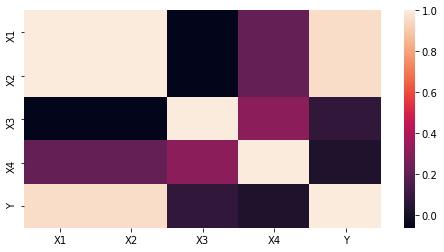

In [26]:
#Method 1 to Detect MultiCollinearity
plt.rcParams["figure.figsize"] = (8,4)
sns.heatmap(data.corr())
plt.show()

#Here we can see that X1 and X2 have a high and similar correlation coefficient
#(Also X3 and X4 have similar coefficients but they are lower so we can allow low collinearity)



2. VIF : VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. “

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [46]:
X = data.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,X2,4.716810
1,X3,3.573629
2,X4,5.953783


1. VIF starts at 1 and has no upper limit
2. VIF = 1, no correlation between the independent variable and the other variables
3. VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [52]:
import statsmodels.api as sm
model=sm.OLS(data['Y'],X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              28.80
Date:                Sun, 19 Sep 2021   Prob (F-statistic):                      0.0337
Time:                        07:22:13   Log-Likelihood:                         -2.3403
No. Observations:                   5   AIC:                                      10.68
Df Residuals:                       2   BIC:                                      9.509
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/home/azure/.pyenv/versions/3.6.5/envs/jupyter/lib/python3.6/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


1. R-squared is also called the coefficient of determination. It’s a statistical measure of how well the regression line fits the data.
2. Adjusted R-squared actually adjusts the statistics based on the number of independent variables present.
3. The ratio of deviation of the estimated value of a parameter from its hypothesized value to its standard error is called t-statistic.
4. F-statistic is calculated as the ratio of mean squared error of the model and mean squared error of residuals.
5. AIC stands for Akaike Information Criterion, which estimates the relative quality of statistical models for a given dataset.
6. BIC stands for Bayesian Information Criterion, which is used as a criterion for model selection among a finite set of models. BIC is like AIC, however it adds a higher penalty for models with more parameters.

In [37]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,data['Y'])
r_sq = lr.score(X,data['Y'])
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9997148826685157


In [42]:
data.drop(columns=['X1'],inplace=True)

In [43]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
X = data.iloc[:,:-1]
lr.fit(X,data['Y'])
r_sq = lr.score(X,data['Y'])
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9997148826685157


In [44]:
X.head()

,X2,X3,X4
0,2,2,3
1,3,6,1
2,4,3,3
3,5,7,5
4,6,1,2


### Correction of Multicollinearity

Since multicollinearity inflates the variance of coefficients and causes type II errors, it is essential to detect and correct it. There are two simple and commonly used ways to correct multicollinearity, as listed below:

1. The first one is to remove one (or more) of the highly correlated variables. Since the information provided by the variables is redundant, the coefficient of determination will not be greatly impaired by the removal.

2. The second method is to use principal components analysis (PCA) or partial least square regression (PLS) instead of OLS regression. PLS regression can reduce the variables to a smaller set with no correlation among them. In PCA, new uncorrelated variables are created. It minimizes information loss and improves the predictability of a model.

